In [1]:
import numpy as np 
import pandas as pd

from glob import glob
from skimage.io import imread
from skimage import img_as_float
import matplotlib.pyplot as plt
from skimage.measure import regionprops
from skimage.morphology import label
from skimage.filters import try_all_threshold
from skimage.morphology import label
from skimage.segmentation import mark_boundaries
from scipy.stats import ttest_ind

import os
print(os.listdir("input"))

['ElectrodeIIa', 'NMC_90wt_0bar', 'NMC_90wt_2000bar']


In [2]:
!ls input -R 

input:
ElectrodeIIa  NMC_90wt_0bar  NMC_90wt_2000bar

input/ElectrodeIIa:
Part_a

input/ElectrodeIIa/Part_a:
II_1

input/ElectrodeIIa/Part_a/II_1:
II_1_bin.tif  II_1_raw.tif

input/NMC_90wt_0bar:
NMC_90wt_0bar

input/NMC_90wt_0bar/NMC_90wt_0bar:
grayscale

input/NMC_90wt_0bar/NMC_90wt_0bar/grayscale:
NMC_90wt_0bar_001.tif  NMC_90wt_0bar_074.tif  NMC_90wt_0bar_147.tif
NMC_90wt_0bar_002.tif  NMC_90wt_0bar_075.tif  NMC_90wt_0bar_148.tif
NMC_90wt_0bar_003.tif  NMC_90wt_0bar_076.tif  NMC_90wt_0bar_149.tif
NMC_90wt_0bar_004.tif  NMC_90wt_0bar_077.tif  NMC_90wt_0bar_150.tif
NMC_90wt_0bar_005.tif  NMC_90wt_0bar_078.tif  NMC_90wt_0bar_151.tif
NMC_90wt_0bar_006.tif  NMC_90wt_0bar_079.tif  NMC_90wt_0bar_152.tif
NMC_90wt_0bar_007.tif  NMC_90wt_0bar_080.tif  NMC_90wt_0bar_153.tif
NMC_90wt_0bar_008.tif  NMC_90wt_0bar_081.tif  NMC_90wt_0bar_154.tif
NMC_90wt_0bar_009.tif  NMC_90wt_0bar_082.tif  NMC_90wt_0bar_155.tif
NMC_90wt_0bar_010.tif  NMC_90wt_0bar_083.tif  NMC_90wt_0bar_156.tif
NMC_90wt_0bar_011.

In [3]:
all_files = sorted(glob('input/nmc_90wt_0bar/NMC_90wt_0bar/grayscale/*.tif'))
print(len(all_files), all_files[13])

218 input/nmc_90wt_0bar/NMC_90wt_0bar/grayscale/NMC_90wt_0bar_014.tif


In [4]:
img = imread(all_files[13])
img_float = img_as_float(img)

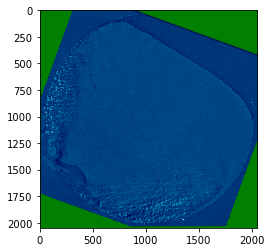

In [5]:
plt.imshow(img_float, cmap = plt.cm.ocean)

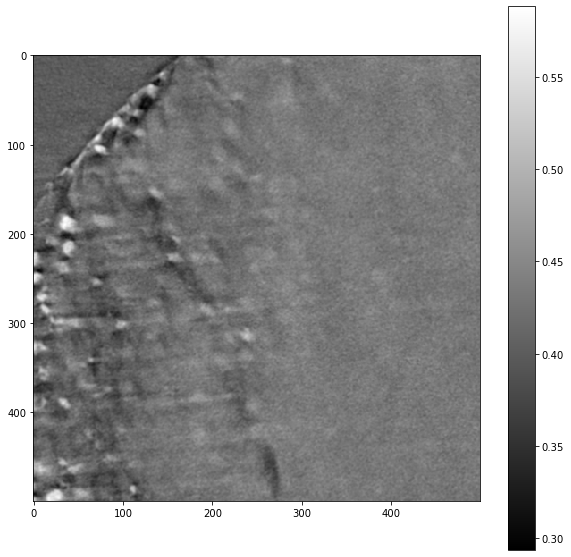

In [6]:
fig, ax1 = plt.subplots(1,1,figsize = (10,10))
img_plot = ax1.imshow(img_float[250:750, 250:750], cmap = 'gray')
plt.colorbar(img_plot)

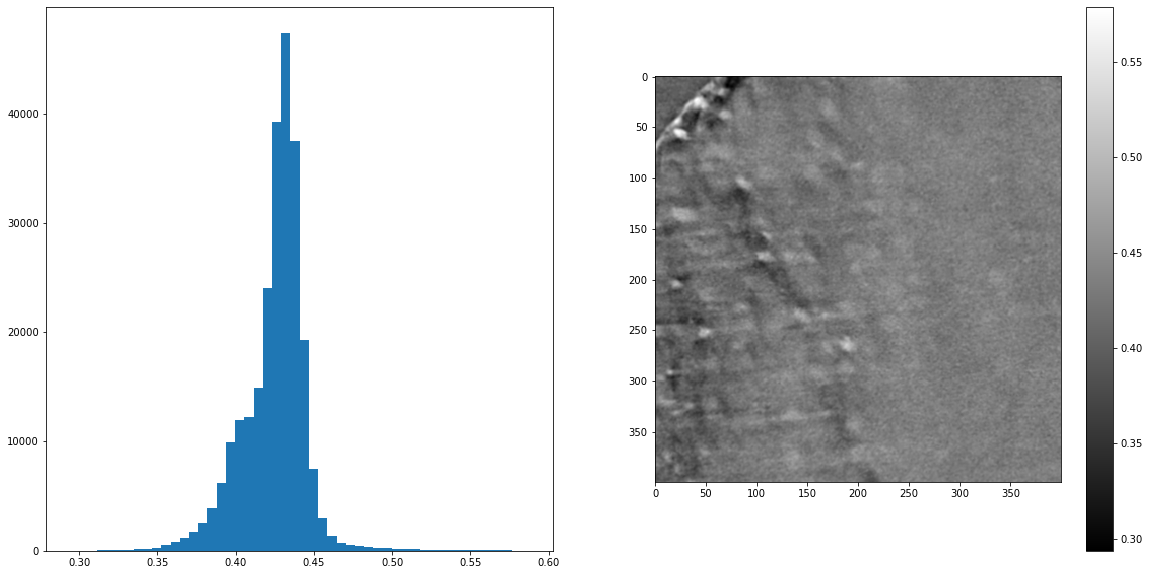

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.hist(img_float[250:750, 250:750].ravel(), 50)
img_plot_view = ax2.imshow(img_float[300:700, 300:700], cmap = 'gray')
plt.colorbar(img_plot_view)

In [8]:
middle_image = imread(all_files[133])
middle_img_float = img_as_float(middle_image)

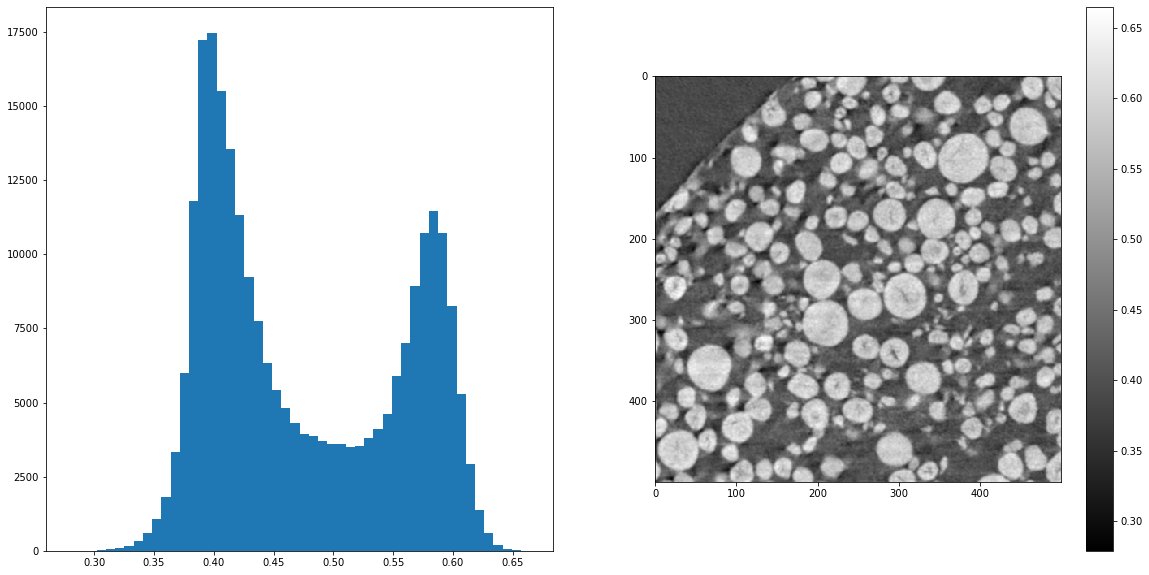

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.hist(middle_img_float[250:750, 250:750].ravel(), 50)
img_plot_view = ax2.imshow(middle_img_float[250:750, 250:750], cmap = 'gray')
plt.colorbar(img_plot_view)

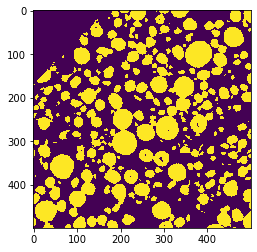

In [10]:
roi_img = middle_img_float[250:750, 250:750]
plt.imshow(roi_img>0.5)

In [11]:
def try_threshold(thresh_val):
    roi_img = middle_img_float[250:750, 250:750]
    seg_img = roi_img>thresh_val
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (21, 7))
    ax1.hist(roi_img.ravel(), 50)
    ax1.axvline(thresh_val, color = 'red')
    ax1.set_title('Intensity Distribution')
    ax2.imshow(seg_img)
    ax2.set_title('Threshold Image')
    ax3.hist([c_reg.major_axis_length for c_reg in regionprops(label(seg_img))])
    ax3.set_title('Object Diameters')
    img_plot_view = ax4.imshow(roi_img, cmap = 'gray')
    ax4.set_title('ROI Image')
    plt.colorbar(img_plot_view)
    fig.savefig('thresh_image.pdf')
    return seg_img

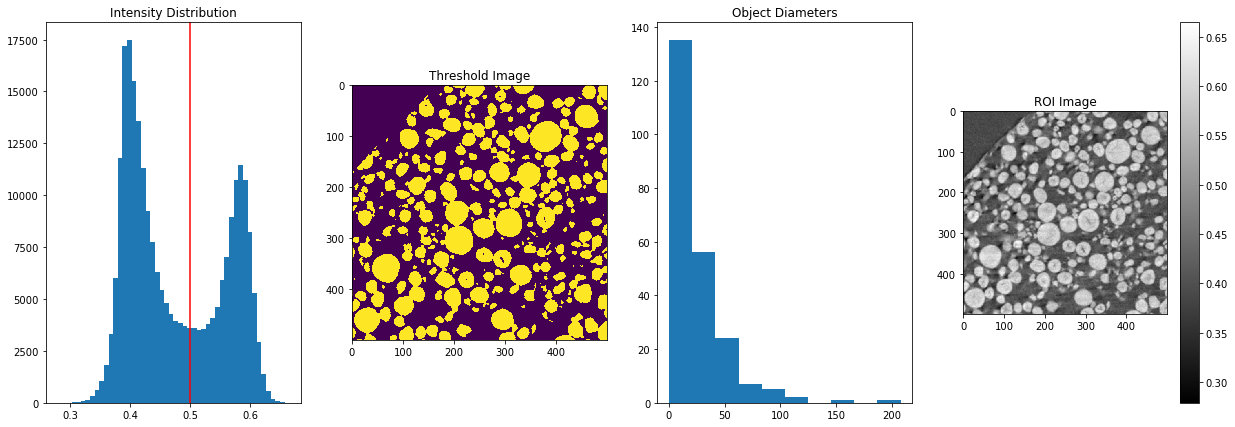

In [12]:
try_threshold(0.5);

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


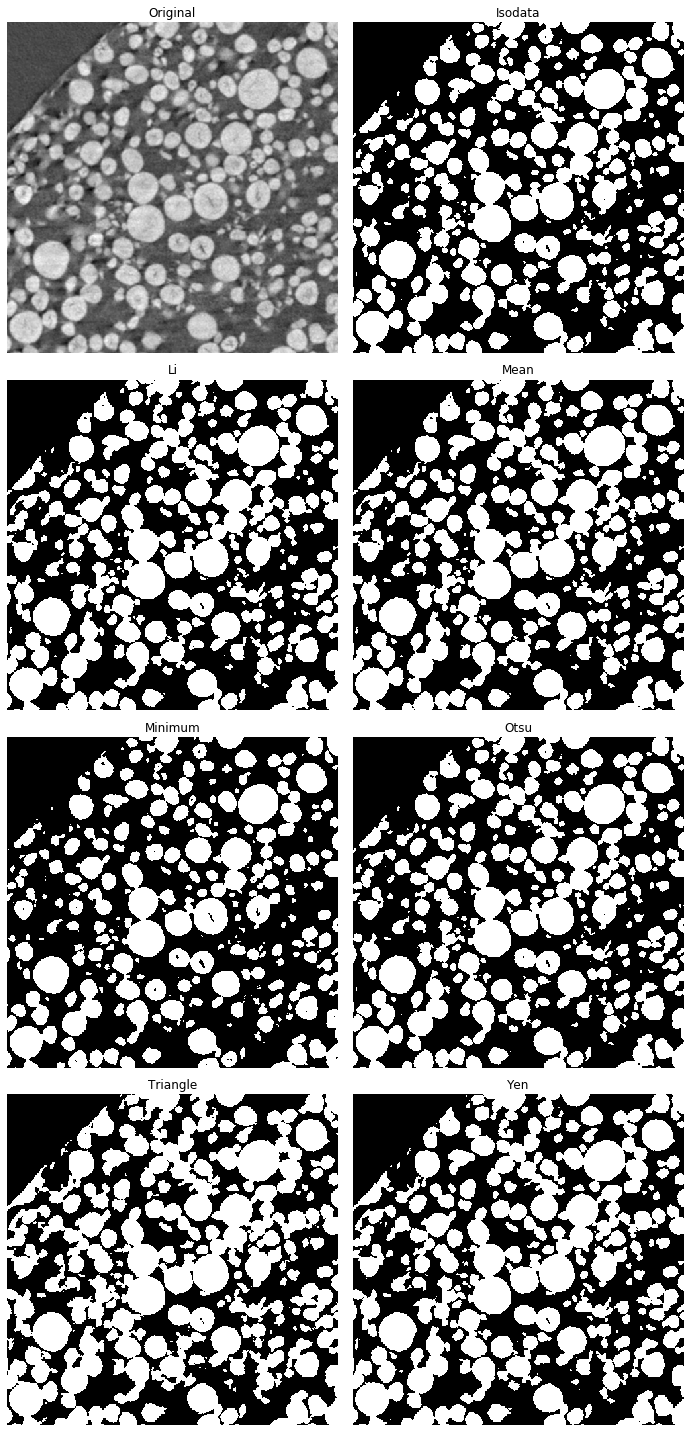

In [13]:
try_all_threshold(middle_img_float[250:750, 250:750], figsize = (10,20));

Objects Found 274


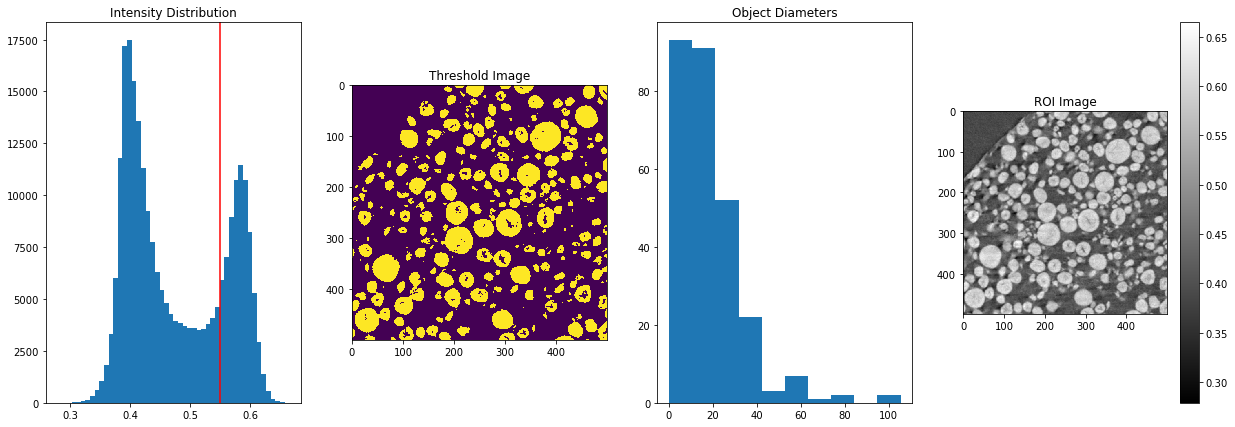

In [14]:
seg_img = try_threshold(0.55)
lab_img = label(seg_img)
print('Objects Found', lab_img.max()+1)

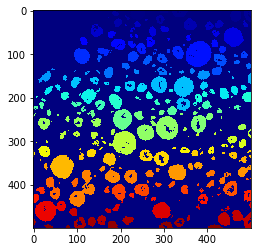

In [15]:
plt.imshow(lab_img, cmap = 'jet')

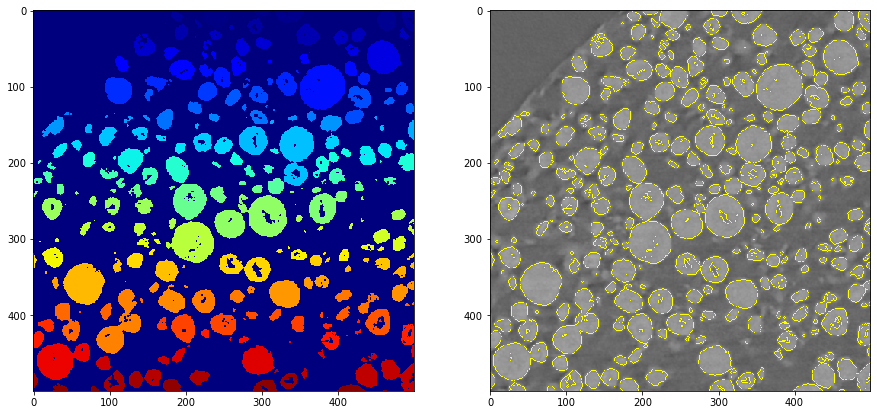

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))
ax1.imshow(lab_img, cmap = 'jet')
ax2.imshow(mark_boundaries(middle_img_float[250:750, 250:750], label_img=lab_img))

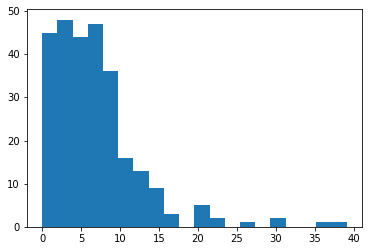

In [17]:
all_radii = []
for c_reg in regionprops(lab_img):
    all_radii += [c_reg.major_axis_length*0.37]
plt.hist(all_radii, 20);

In [18]:
np.mean(all_radii)

6.815524755506423

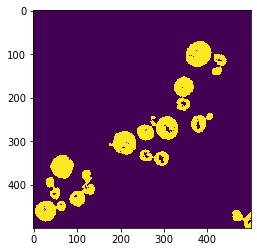

In [19]:
big_particles = []
nd_isin = lambda x, ids: np.isin(x.ravel(),ids).reshape(x.shape)
for c_reg in regionprops(lab_img):
    if c_reg.major_axis_length*0.37>20:
        big_particles += [c_reg.label]
plt.imshow(nd_isin(lab_img, big_particles))

# Now, a comparison to the next example of 2000 bar

In [20]:
hp_files = sorted(glob('input/nmc_90wt_2000bar/NMC_90wt_2000bar/grayscale/*tif'))
print(len(hp_files), hp_files[0])

218 input/nmc_90wt_2000bar/NMC_90wt_2000bar/grayscale/NMC_90wt_2000bar_001.tif


In [21]:
hp_slice = imread(hp_files[110])
hp_slice_float = img_as_float(hp_slice)
hp_slice_float

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

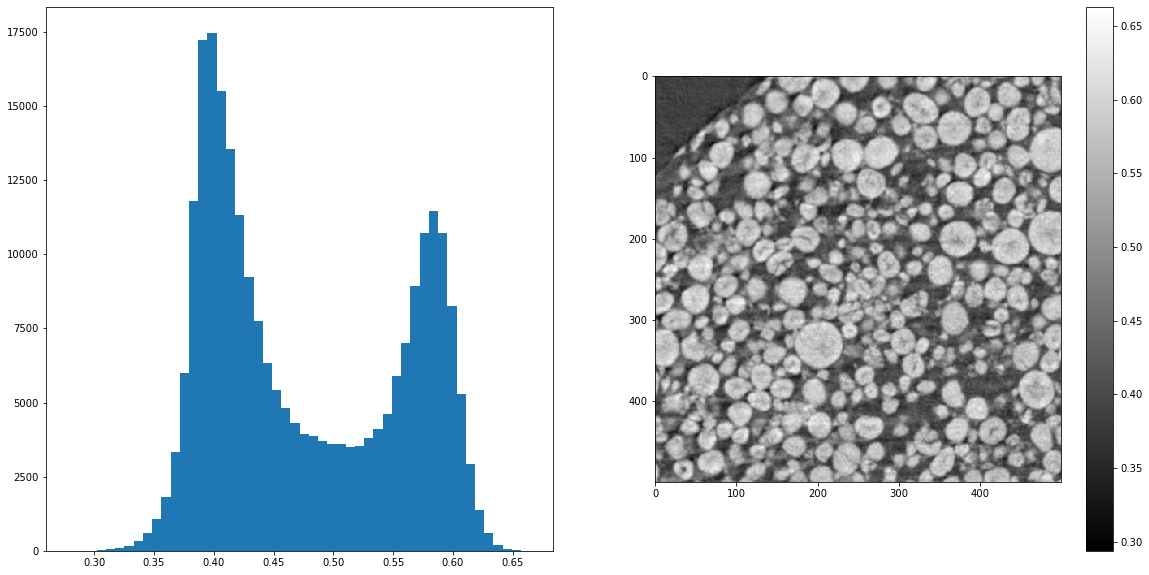

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.hist(middle_img_float[250:750, 250:750].ravel(), 50)
img_plot_view = ax2.imshow(hp_slice_float[250:750, 250:750], cmap = 'gray')
plt.colorbar(img_plot_view)

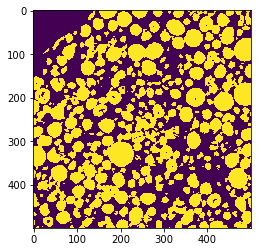

In [23]:
roi_image = hp_slice_float[250:750, 250:750]
plt.imshow(roi_image>0.5)

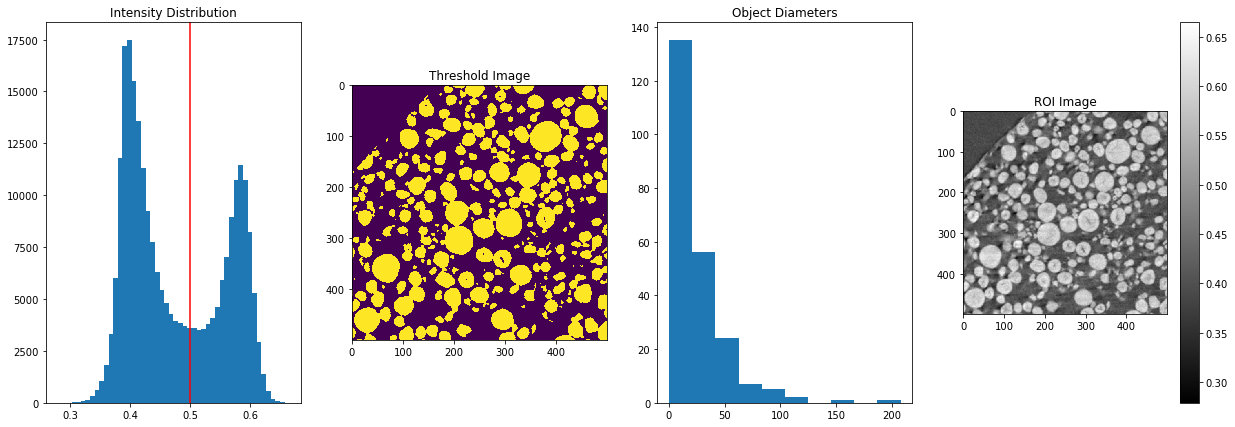

In [24]:
try_threshold(0.5);

In [25]:
seg_hp_img = hp_slice_float[250:750,250:750]>0.50
lab_hp_img = label(seg_hp_img)
print('Objects Found', lab_hp_img.max()+1)

Objects Found 236


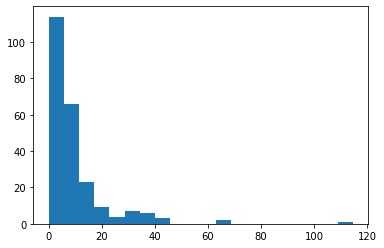

In [26]:
all_hp_radii = []
for c_reg in regionprops(lab_hp_img):
    all_hp_radii += [c_reg.major_axis_length*0.37]
plt.hist(all_hp_radii, 20);

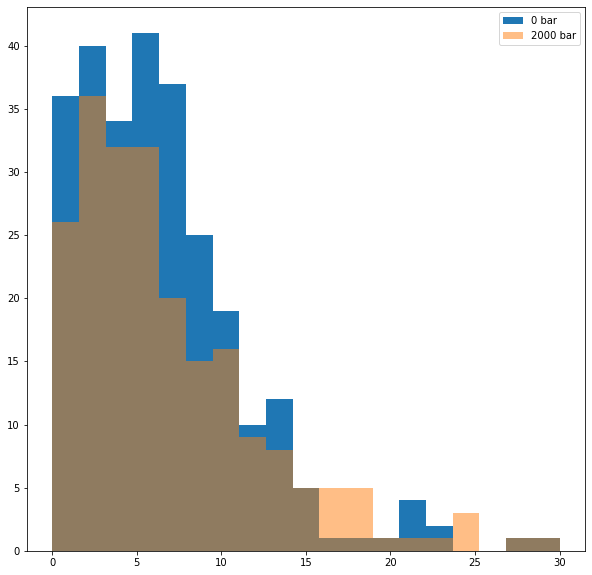

In [27]:
fig, ax1 = plt.subplots(1,1, figsize = (10,10))
ax1.hist(all_radii, np.linspace(0, 30, 20), label = '0 bar')
ax1.hist(all_hp_radii, np.linspace(0, 30, 20), label = '2000 bar', alpha = 0.5)
ax1.legend()

In [28]:
ttest_ind(all_radii, all_hp_radii)

Ttest_indResult(statistic=-3.4665139296883614, pvalue=0.0005721282298574002)